In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Activation, Dense, GlobalAveragePooling2D,Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import regularizers
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Input
import itertools
import collections
import os
import shutil
import random
import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [72]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/0/
   creating: test/1/
   creating: test/2/
   creating: test/3/
  inflating: test/3/1002394761.jpg   
  inflating: test/3/1008284502.jpg   
  inflating: test/3/1009704586.jpg   
  inflating: test/3/1018433055.jpg   
  inflating: test/3/1020387881.jpg   
  inflating: test/3/1022850256.jpg   
  inflating: test/3/1028318593.jpg   
  inflating: test/3/1028446573.jpg   
  inflating: test/3/1036302176.jpg   
  inflating: test/3/1039676268.jpg   
  inflating: test/3/1040156603.jpg   
  inflating: test/3/1047071545.jpg   
  inflating: test/3/1050134400.jpg   
  inflating: test/3/1052903541.jpg   
  inflating: test/3/1053293117.jpg   
  inflating: test/3/1055012871.jpg   
  inflating: test/3/1056943297.jpg   
  inflating: test/3/1057579024.jpg   
  inflating: test/3/1058931181.jpg   
  inflating: test/3/1059782259.jpg   
  inflating: test/3/1060739991.jpg   
  inflating: test/3/1069221450.jpg   
  inflating: test/3/1069921431.jpg   
  in

In [35]:
test_path = './test/'

In [36]:
test_num = sum(len(files) for _, _, files in os.walk(test_path))
print(test_num)

1581


In [73]:
IMG_SHAPE  = 380
BATCH_SIZE = 32

image_gen_test = ImageDataGenerator( rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=test_path,
                                                     shuffle = False,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')

Found 1581 images belonging to 5 classes.


In [50]:
# fun to plot images

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

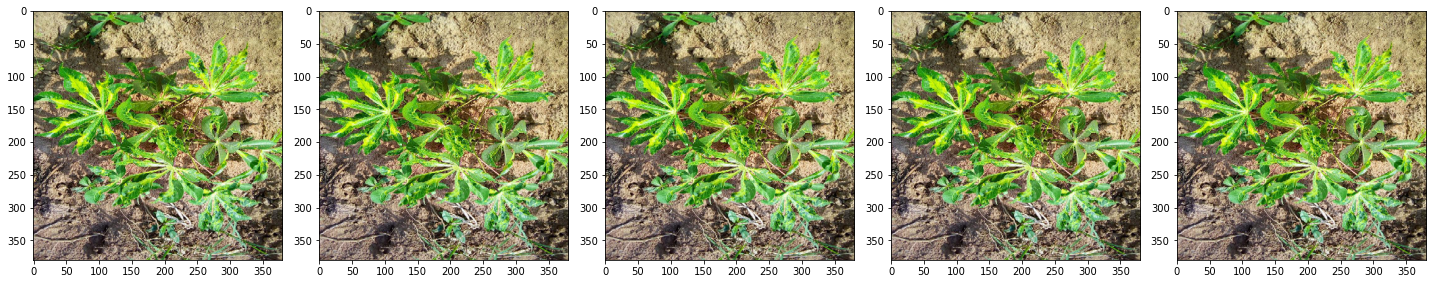

In [51]:
# plot an augmented sample
augmented_images = [test_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [52]:
new_model = load_model('./leaf-disease7.h5')

In [53]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 12, 12, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 16392     
_________________________________________________________________
batch_normalization_10 (Batc (None, 8)                 56        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 45        
Total params: 23,604,205
Trainable params: 23,551,045
Non-trainable params: 53,160
_________________________________________________________________


In [74]:
test_imgs, test_labels = next(test_data_gen)

In [75]:
test_data_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [76]:
predictions = new_model.predict(x=test_data_gen, steps=len(test_data_gen), verbose=0)

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_data_gen.classes, y_pred=predictions.argmax(axis=1))

In [78]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   4   25   50 1390  112]
 [   0    0    0    0    0]]


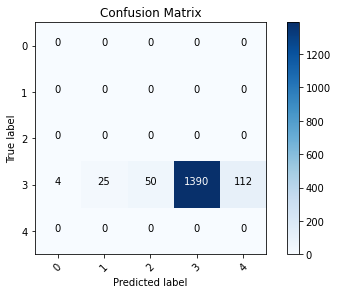

In [79]:
cm_plot_labels = ['0','1','2','3','4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')